# MLP-1: Multiclass classification using a neural network

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold

Using TensorFlow backend.


In [2]:
matrix = pd.read_csv('model/1129-fixed-data-matrix-karlgren.csv').set_index('character')
with open('full-ordering.json', encoding='utf-8') as f:
    matrix = matrix[json.load(f)]

In [3]:
cols = matrix.columns
features_cols = [c for c in cols if 'Karlgren' not in c and 'tone_label' not in c]
labels_cols = [c for c in cols if c not in features_cols]

In [4]:
X_complete = matrix[features_cols]
Y_complete = matrix[labels_cols]
X_train, X_test, Y_train, Y_test = train_test_split(X_complete, Y_complete, test_size=.3)

In [5]:
label_categories = [
    'tone_label',
    'Karlgren_onset',
    'Karlgren_nucleus',
    'Karlgren_coda'
]

In [6]:
def fit_keras_models(X, X_test, Y, Y_test, architecture, n_epochs=200, n_folds=5):
    category_to_performance = defaultdict(list)
    category_to_test_performance = defaultdict(list)
    category_to_callbacks = defaultdict(list)
    
    for category in label_categories:
        Y_subset = Y[[x for x in Y.columns if category in x]]
        Y_test_subset = Y_test[[x for x in Y_test.columns if category in x]]
        n_bins = Y_subset.shape[1]
        
        def build_keras_nn_model():
            model = Sequential()
            model.add(Dense(
                architecture[0][0],
                input_dim=X.shape[1],
                activation=architecture[0][1])
            )
            
            if len(architecture) > 1:
                for l, (hidden_layer_size, act_fn) in enumerate(architecture[1:]):
                    model.add(Dense(
                        hidden_layer_size,
                        input_dim=architecture[l - 1],
                        activation=act_fn)
                    )
                    
            model.add(Dense(n_bins, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            return model
        
        KerasNN = KerasClassifier(
            build_fn=build_keras_nn_model,
            epochs=n_epochs,
            batch_size=256,
            verbose=True
        )
        
        kf = KFold(n_splits=n_folds, random_state=0, shuffle=False)
        for kf_idx, (train_idx, dev_idx) in enumerate(kf.split(X)):
            X_train, X_dev = X.iloc[train_idx], X.iloc[dev_idx]
            Y_train, Y_dev = Y_subset.iloc[train_idx], Y_subset.iloc[dev_idx]
            
            hist_callback = KerasNN.fit(
                X_train,
                Y_train,
                validation_data=(X_dev, Y_dev)
            )
            
            category_to_callbacks[category].append(hist_callback)
            dev_score = KerasNN.score(X_dev, Y_dev)
            category_to_performance[category].append(dev_score)
            test_acc = KerasNN.score(X_test, Y_test_subset)
            category_to_test_performance[category].append(test_acc)
            print('Category: {:16s}\tCV: {} of {}\tDev performance: {:.3f}'.format(
                category, kf_idx + 1, n_folds, float(dev_score)))
    return category_to_performance, category_to_callbacks, category_to_test_performance

In [7]:
N_EPOCHS = 15
N_FOLDS = 5
ARCHITECTURE = [
    (32, 'relu'),
    (32, 'relu')
]

performance, callbacks, test_performance = fit_keras_models(
    X_train,
    X_test,
    Y_train,
    Y_test,
    architecture=ARCHITECTURE,
    n_epochs=N_EPOCHS,
    n_folds=N_FOLDS
)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8540 samples, validate on 2135 samples
Epoch 1/15





8540/8540 [==============================] - 1s 157us/step - loss: 1.2381 - acc: 0.4485 - val_loss: 1.1096 - val_acc: 0.4609
Epoch 2/15
8540/8540 [==============================] - 0s 26us/step - loss: 0.9420 - acc: 0.5944 - val_loss: 0.7816 - val_acc: 0.7372
Epoch 3/15
8540/8540 [==============================] - 0s 22us/step - loss: 0.6602 - acc: 0.7760 - val_loss: 0.6067 - val_acc: 0.7902
Epoch 4/15
8540/8540 [==============================] - 0s 21us/step - loss: 0.5659 - acc: 0.7974 - val_loss: 0.5779 - val_acc: 0.7958
Epoch 5/15
8540/8540 [==============================] - 0s 21us/step - loss: 0.5377 - acc: 0.8019 - val_loss: 0.5685 - val_acc: 0.7953
Epoch 6/15
8540/8540 [==============================] - 0s 22us/step - loss: 0.5214 - acc: 0.8048 - val_loss: 0.5693 - val_acc: 0.7939
Epoch 7/15
8540/8540 [============

8540/8540 [==============================] - 0s 26us/step - loss: 0.5200 - acc: 0.8085 - val_loss: 0.5698 - val_acc: 0.7920
Epoch 7/15
8540/8540 [==============================] - 0s 25us/step - loss: 0.5113 - acc: 0.8061 - val_loss: 0.5637 - val_acc: 0.7925
Epoch 8/15
8540/8540 [==============================] - 0s 30us/step - loss: 0.5027 - acc: 0.8123 - val_loss: 0.5646 - val_acc: 0.7934
Epoch 9/15
8540/8540 [==============================] - 0s 33us/step - loss: 0.4958 - acc: 0.8128 - val_loss: 0.5644 - val_acc: 0.7934
Epoch 10/15
8540/8540 [==============================] - 0s 23us/step - loss: 0.4906 - acc: 0.8152 - val_loss: 0.5641 - val_acc: 0.7930
Epoch 11/15
8540/8540 [==============================] - 0s 25us/step - loss: 0.4852 - acc: 0.8166 - val_loss: 0.5655 - val_acc: 0.7920
Epoch 12/15
8540/8540 [==============================] - 0s 24us/step - loss: 0.4814 - acc: 0.8181 - val_loss: 0.5686 - val_acc: 0.7897
Epoch 13/15
8540/8540 [==============================] - 0s 24u

4575/4575 [==============================] - 0s 12us/step
Category: Karlgren_onset  	CV: 1 of 5	Dev performance: 0.716
Train on 8540 samples, validate on 2135 samples
Epoch 1/15
8540/8540 [==============================] - 2s 250us/step - loss: 3.4573 - acc: 0.0981 - val_loss: 3.2898 - val_acc: 0.1311
Epoch 2/15
8540/8540 [==============================] - 0s 29us/step - loss: 3.0662 - acc: 0.1582 - val_loss: 2.8053 - val_acc: 0.2450
Epoch 3/15
8540/8540 [==============================] - 0s 30us/step - loss: 2.5443 - acc: 0.3388 - val_loss: 2.2749 - val_acc: 0.4314
Epoch 4/15
8540/8540 [==============================] - 0s 31us/step - loss: 2.0358 - acc: 0.5005 - val_loss: 1.8308 - val_acc: 0.5410
Epoch 5/15
8540/8540 [==============================] - 0s 32us/step - loss: 1.6588 - acc: 0.5946 - val_loss: 1.5377 - val_acc: 0.6103
Epoch 6/15
8540/8540 [==============================] - 0s 30us/step - loss: 1.4208 - acc: 0.6454 - val_loss: 1.3638 - val_acc: 0.6464
Epoch 7/15
8540/8540 [

8540/8540 [==============================] - 0s 36us/step - loss: 1.0302 - acc: 0.7130 - val_loss: 1.0964 - val_acc: 0.6932
Epoch 11/15
8540/8540 [==============================] - 0s 34us/step - loss: 0.9982 - acc: 0.7190 - val_loss: 1.0772 - val_acc: 0.6946
Epoch 12/15
8540/8540 [==============================] - 0s 34us/step - loss: 0.9731 - acc: 0.7254 - val_loss: 1.0593 - val_acc: 0.7054
Epoch 13/15
8540/8540 [==============================] - 0s 33us/step - loss: 0.9541 - acc: 0.7288 - val_loss: 1.0532 - val_acc: 0.7049
Epoch 14/15
8540/8540 [==============================] - 0s 34us/step - loss: 0.9372 - acc: 0.7307 - val_loss: 1.0452 - val_acc: 0.7059
Epoch 15/15
4575/4575 [==============================] - 0s 14us/step
Category: Karlgren_onset  	CV: 5 of 5	Dev performance: 0.718
Train on 8540 samples, validate on 2135 samples
Epoch 1/15
8540/8540 [==============================] - 3s 334us/step - loss: 4.0234 - acc: 0.0680 - val_loss: 3.8632 - val_acc: 0.1026
Epoch 2/15
8540/8

Epoch 4/15
8540/8540 [==============================] - 0s 35us/step - loss: 2.5833 - acc: 0.3653 - val_loss: 2.3839 - val_acc: 0.4028
Epoch 5/15
8540/8540 [==============================] - 0s 34us/step - loss: 2.1480 - acc: 0.4699 - val_loss: 2.0228 - val_acc: 0.4801
Epoch 6/15
8540/8540 [==============================] - 0s 34us/step - loss: 1.8399 - acc: 0.5385 - val_loss: 1.7789 - val_acc: 0.5372
Epoch 7/15
8540/8540 [==============================] - 0s 34us/step - loss: 1.6362 - acc: 0.5859 - val_loss: 1.6121 - val_acc: 0.5686
Epoch 8/15
8540/8540 [==============================] - 0s 35us/step - loss: 1.4974 - acc: 0.6150 - val_loss: 1.5068 - val_acc: 0.5845
Epoch 9/15
8540/8540 [==============================] - 0s 35us/step - loss: 1.3986 - acc: 0.6323 - val_loss: 1.4289 - val_acc: 0.6000
Epoch 10/15
8540/8540 [==============================] - 0s 34us/step - loss: 1.3255 - acc: 0.6443 - val_loss: 1.3759 - val_acc: 0.6126
Epoch 11/15
8540/8540 [==============================]

8540/8540 [==============================] - 0s 24us/step - loss: 0.1169 - acc: 0.9294 - val_loss: 0.1677 - val_acc: 0.9311
Epoch 15/15
4575/4575 [==============================] - 0s 9us/step
Category: Karlgren_coda   	CV: 2 of 5	Dev performance: 0.931
Train on 8540 samples, validate on 2135 samples
Epoch 1/15
8540/8540 [==============================] - 3s 301us/step - loss: 1.6370 - acc: 0.4415 - val_loss: 1.3198 - val_acc: 0.5040
Epoch 2/15
8540/8540 [==============================] - 0s 23us/step - loss: 1.0506 - acc: 0.6007 - val_loss: 0.7550 - val_acc: 0.7082
Epoch 3/15
8540/8540 [==============================] - 0s 24us/step - loss: 0.5768 - acc: 0.8075 - val_loss: 0.3864 - val_acc: 0.8712
Epoch 4/15
8540/8540 [==============================] - 0s 24us/step - loss: 0.3162 - acc: 0.8999 - val_loss: 0.2521 - val_acc: 0.9124
Epoch 5/15
8540/8540 [==============================] - 0s 24us/step - loss: 0.2203 - acc: 0.9252 - val_loss: 0.2046 - val_acc: 0.9185
Epoch 6/15
8540/8540 [

In [13]:
# MODE = 'median'
# # MODE = 'best'

# ax = plt.figure(figsize=(4,3), dpi=200)
# plt.title('Validation accuracies (' + MODE + ' from CV splits)')
# plt.xlabel('# epochs')
# plt.ylabel('Accuracy')
# xrange = range(1, N_EPOCHS + 1)
# plt.xticks(xrange, xrange)
# for category in label_categories:
#     if MODE == 'median':
#         run_idx = performance[category].index(sorted(performance[category])[len(performance[category]) // 2])
#     else:
#         run_idx = performance[category].index(max(performance[category]))
#     hist = callbacks[category][run_idx].history
#     plt.plot(xrange, hist['val_acc'], label=category, alpha=.5)
# plt.legend(loc='lower right')
# plt.show()
# ax.savefig('nn-cv-val-acc.png', format='png')

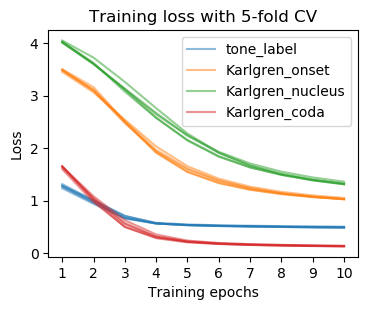

In [16]:
ax = plt.figure(figsize=(4,3), dpi=100)
plt.title('Training loss with 5-fold CV')
plt.xlabel('Training epochs')
plt.ylabel('Loss')
xrange = range(1, N_EPOCHS + 1 - 5)
plt.xticks(xrange, xrange)
for idx, category in enumerate(label_categories):
    for fold in range(N_FOLDS):
        val_acc = callbacks[category][fold].history['loss'][:-5]
        if not fold: 
            plt.plot(xrange, val_acc, label=category, color='C' + str(idx), alpha=.5)
        else:
            plt.plot(xrange, val_acc, label='__nolegend__', color='C' + str(idx), alpha=.5)
plt.legend()
# plt.tight_layout()
plt.show()
# ax.savefig('nn-cv-train-loss.eps', format='eps')

In [17]:
for cat in label_categories:
    med = sorted(performance[cat])[len(performance[cat]) // 2]
    idx = performance[cat].index(med)
    print('{:16s}\t{:2.3f}%'.format(cat, 100 * test_performance[cat][idx]))

tone_label      	80.328%
Karlgren_onset  	69.967%
Karlgren_nucleus	63.519%
Karlgren_coda   	92.284%


In [11]:
test_performance

defaultdict(list,
            {'tone_label': [0.8041530066370313,
              0.8015300555698207,
              0.8006557381869666,
              0.8032786890066387,
              0.8065573757593749],
             'Karlgren_onset': [0.6963934436912745,
              0.69442622924763,
              0.6996721322158647,
              0.7040437153388893,
              0.6985792355980378],
             'Karlgren_nucleus': [0.6434972690233116,
              0.629508196161093,
              0.6448087441856093,
              0.6443715857156639,
              0.6351912562703825],
             'Karlgren_coda': [0.9228415291166044,
              0.9239344252914679,
              0.922841529559568,
              0.9228415291166044,
              0.9237158460564953]})

In [12]:
len(Y_complete[[x for x in Y_complete.columns if 'nucleus' in x]].columns)

62